<a href="https://colab.research.google.com/github/SreevarP/VoiceSynthesis/blob/main/VoiceSynthesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf 
from tensorflow import *
import librosa 
from librosa import display
import matplotlib.pyplot as plt
from IPython.display import Audio
import numpy as np

In [ ]:
path = "/content/drive/MyDrive/New Recording 13.wav"
Audio(path)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


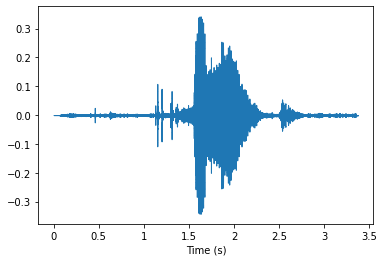

In [ ]:
X, sr = librosa.load(path, sr=32000)
librosa.display.waveshow(X, max_points=11025, x_axis='s')

In [ ]:
from scipy.io.wavfile import write
from scipy.io.wavfile import read

rate = 44100
data = np.random.uniform(-1, 1, rate) # 1 second worth of random samples between -1 and 1
scaled = np.int16(data / np.max(np.abs(data)) * 32767)
write('test.wav', rate, scaled)

In [ ]:
def WavToND(path):
  y, sr = librosa.load(path, sr=32000)
  return y 

def NDToWav(ndarray):
  rate = 32000
  write('test.wav', rate, ndarray)

In [ ]:
NDToWav(WavToND(path))
Audio('test.wav')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
Audio('test.wav')

In [ ]:
x_train = np.random.rand(74411, 1) / X.max()
x_train.shape, X.max(), x_train.max()

((74411, 1), 0.34308767, 2.914703038804933)

In [ ]:
X.max()

0.34308767

In [ ]:
X.reshape((74411, 1))
X = X
x_train = np.random.uniform(low=0, high=X.max(), size=(74411,1))

In [ ]:
X.max(), x_train.max()

(0.34308767, 0.34308711302090666)

In [ ]:
from keras import layers
encoding_dimensions = 100

input_audio = keras.Input(shape=(1, ))

encoded_layer = layers.Dense(encoding_dimensions, activation='relu')(input_audio)

decoded = layers.Dense(1, activation='sigmoid')(encoded_layer)

autoencoder = keras.Model(input_audio, decoded)

In [ ]:
encoded_layer
opt = keras.optimizers.Adam()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, X, epochs=1, validation_data=(x_train, X))

2326/2326 [==============================] - 10s 4ms/step - loss: 0.0331 - val_loss: 6.8173e-04


In [ ]:
prediction = autoencoder.predict(x_train)

2326/2326 [==============================] - 3s 1ms/step


In [ ]:
prediction.shape

(74411, 1)

In [ ]:

NDToWav(prediction.reshape(74411, ))
Audio('test.wav')

In [ ]:
x_train = x_train / (X.max() ** -2)

In [ ]:
fro 